In [117]:
import numpy as np
import random
import skimage.data as da
import matplotlib.pyplot as plt
import cv2

# TODO: load images from absalon
image = da.camera()

In [118]:
# inspiration taken from here: https://datasciencelab.wordpress.com/tag/lloyds-algorithm/
def lloyd(img, k):
    
    # the idea here is to create a dict in which the keys are both cluster centroids
    # and the respective values are the indices of the picture
    cluster = {}
    
    # first, let's initialize a list of random centroids
    old_cent = []
    new_cent = random.sample(list(img[0]), k)
        
    # initialize keys in cluster dict
    for k in new_cent:
        cluster[k] = []
        
    # as long as old centroids and new centroids aren't the same:
    while not np.array_equal(old_cent, new_cent):
        old_cent = new_cent
        # assign points to the new centroid
        cluster = assign_cent(old_cent, img)
        # compute new centroids according to the cluster
        new_cent = make_new_center(cluster)
        
    # now we have all clustered values in a dict and just have to
    # convert this into a picture
    for k in cluster.keys():
        for i in cluster[k]:
            img[i] = k
    
    # it doesn't return a modified image yet
    return img

# with cents == list of all centroids and 
# img == image to be centroided
def assign_cent(cents, img):
    
    new_cluster = {}
    min_dis = len(img)**2
    near_cent = 0
        
    # iter over every point in the image
    for i in range(np.size(img,0)):
        for j in range(np.size(img,1)):
            temp_arr = []

            # find the nearest center for this point by iterating
            # through the cenroids and calculating their distance to centroid
            for cent in cents:
                temp = int((cent - img[i][j]))**2
                if temp < min_dis:
                    min_dis = temp

                    # nearest centroid is always the same WHY?
                    near_cent = cent

            # add this point according new key in the cluster dict
            if near_cent in new_cluster:
                new_cluster[near_cent].append((i, j))
            else:
                new_cluster[near_cent] = [(i, j)]
    
    return new_cluster
    
def make_new_center(data_cluster):
    new_cents = []
    keys = sorted(data_cluster.keys())
    # get mean for every key in the cluster
    for k in keys:
        print()
        new_cents.append(np.mean(data_cluster[k]))
    
    return new_cents

<ipython-input-118-875326e83993>:53: RuntimeWarning: overflow encountered in ubyte_scalars
  temp = int((cent - img[i][j]))**2


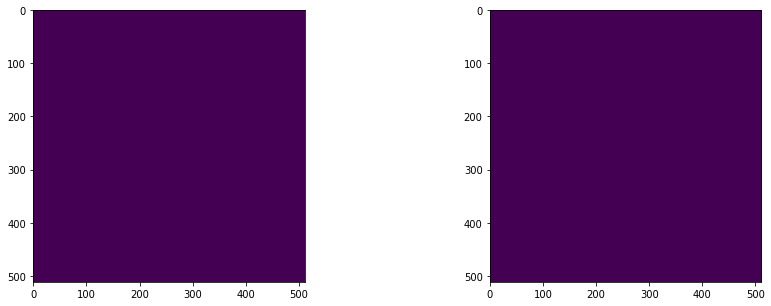

In [119]:
lloyd_img = lloyd(image, 2)
fig, ax = plt.subplots(1,2,figsize=(15,5))

ax[0].imshow(image)
ax[1].imshow(lloyd_img)
plt.show()

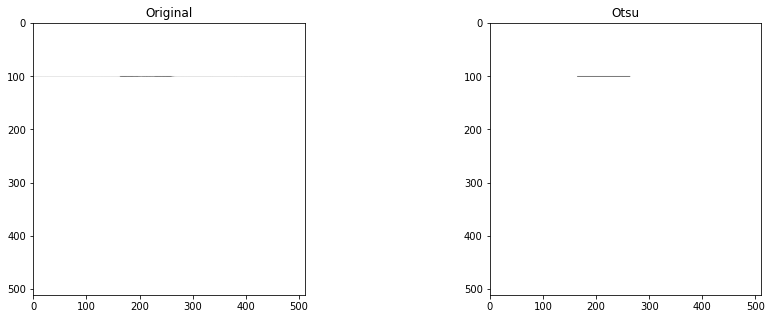

In [102]:
from skimage.filters import threshold_otsu

thresh = threshold_otsu(image)
otsu = image > thresh

fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].imshow(image,cmap='gray')
ax[0].set_title('Original')
ax[1].imshow(otsu,cmap='gray')
ax[1].set_title('Otsu')
plt.show()

# 